Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02c. Nuclear Data and Data Processing: Cumulative Fission Product Yields 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Cumulative (Decayed) fission fragment yield (A,Z)](#cffyaz)
* [Data sets](#dataset)
* [Cumulative fission products half-life times](#cfphalflife)
---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.
+ Explore alternative sources of data and their data mining.

## Introduction<a id="intro"></a>

Refer to Notebook 02.

## Independent and cumulative (decayed) fission fragment yield (A,Z)<a id="cffyaz"></a>

Acquiring the data:

+ This data is from `ENDF/B-VIII.0,Ei=0.0253eV` which is the same data base used in the Notebook 02b, but was acquired from a **third-party evaluation**.
+ *This data combines the independent and cumulative FPY in one file and it also includes the half-life of the FP*.
+ The data also includes both Z and A numbers of the nuclides and whether they are metastable.

## Data sets<a id="dataset"></a>

The following data sets are available:
 + `u-235-fpy-AZ-thermal.csv`
 + `u-233-fpy-AZ-thermal.csv`
 + `pu-239-fpy-AZ-thermal.csv`

In [1]:
'''Select data set'''

data_set = 'u-235-fpy-AZ-thermal.csv'

In [23]:
'''View the raw data (edit the file name)'''

!head -n 5 data/u-235-fpy-AZ-thermal.csv
print('...')
!tail -n 5 data/u-235-fpy-AZ-thermal.csv

Compare,Nuclide,Half-lives,Ind. Yield(% per fiss.),Cum. Yield(% per fiss.)
Compare,54 Xe 134,,0.0105,7.87
Compare,53 I 134,52.5 m,0.500,7.83
Compare,52 Te 134,41.8 m,6.22,6.97
Compare,56 Ba 138,Stable,4.12e-3,6.77
...
Compare,71 Lu 171m,79 s,no data,no data
Compare,71 Lu 172,6.70 d,no data,no data
Compare,71 Lu 172m,3.7 m,no data,no data
Compare,72 Hf 171,12.1 h,no data,no data
Compare,72 Hf 172,1.87 y,no data,no data


In [3]:
'''Function to read the blank-spaced column data into a Pandas data frame (table)'''

def read_table(file_name):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''
    import pandas as pd
    
    df = pd.read_csv( file_name,  
                      skiprows=0,
                      delim_whitespace=False)
    
    df.fillna('0 s',inplace=True)
    
# to avoid frustrations, set explicitly the data types of each column
    #for c in df.columns: 
        #if c == 'Y(NO-DIM)':
            #continue
        #df = df.astype({c:float},copy=False)

    #print(df.dtypes)
    return df

In [4]:
'''Read data'''

fpy_az_df = read_table('data/'+data_set)

In [5]:
'''A peek on the raw data'''

fpy_az_df

,Compare,Nuclide,Half-lives,Ind. Yield(% per fiss.),Cum. Yield(% per fiss.)
0,Compare,54 Xe 134,0 s,0.0105,7.87
1,Compare,53 I 134,52.5 m,0.500,7.83
2,Compare,52 Te 134,41.8 m,6.22,6.97
3,Compare,56 Ba 138,Stable,4.12e-3,6.77
4,Compare,55 Cs 138,33.41 m,0.243,6.71
5,Compare,54 Xe 133,5.243 d,6.66e-4,6.70
6,Compare,55 Cs 133,Stable,7.92e-7,6.70
7,Compare,53 I 133,20.8 h,0.0825,6.70
8,Compare,55 Cs 135,2.3 My,2.45e-4,6.54
9,Compare,56 Ba 135,Stable,3.82e-8,6.54


In [6]:
'''Function for creating a FP yield(A,Z) list container'''

def get_fpy_az( df ):
    '''
    Create a list of named tuple nuclides
    Parameters
    ----------
    df: pandas data frame, required
        Table of data for nuclides.
    
    Returns
    -------
    nuclides: list(namedtuple)
        List of namedtuples. Names: name, element_name, Z, A, half_life, independent_yield_percent, cumulative_yield_percent.

    Examples
    --------
    '''
    
    nuclides = list()

    # design a container data structure
    from collections import namedtuple
    FPY = namedtuple('FPY', ['name','element_name','Z','A','half_life','independent_yield_percent','cumulative_yield_percent'])

    import pandas as pd

    # Use the Mendeleev python package (periodic table of elements)
    from mendeleev import element
    
    total_cumulative_yield = 0.0 # sum total yield
    total_independent_yield = 0.0
    
    for row in df.itertuples(index=False):
        
        if row[2].strip() == 'Stable': # skip all stable FP
            continue
            
        assert isinstance(row[1],str),'row[1] = %r'%row[1]
        
        col1 = row[1].strip().split(' ')
        assert len(col1) == 3,'col1 = %r'%col1 # must have 3 elements
        
        z = int(col1[0])
        symbol = col1[1]
        
        if col1[2][-1] == 'm':
            a = int(col1[2][0:-1])
            nuclide_name = symbol + '-' + str(a) + 'm'
        elif col1[2][-1] == 'n':
            a = int(col1[2][0:-1])
            nuclide_name = symbol + '-' + str(a) + 'n'
        else:
            a = int(col1[2]) 
            nuclide_name = symbol+'-'+str(a)
        
        assert isinstance(row[2],str),'row[2] = %r'%row[2]
        
        col2 = row[2].strip().split(' ')
        assert len(col2) == 2,'col2 = %r'%col2
        
        half_life_unit = col2[1]
        
        # convert all values to second
        if half_life_unit == 'ns':
            half_life = float(col2[0])*1e-9
        elif half_life_unit == 'ms':
            half_life = float(col2[0])*1e-3
        elif half_life_unit == 's':
            half_life = float(col2[0])
        elif half_life_unit == 'm':
            half_life = float(col2[0])*60
        elif half_life_unit == 'h':
            half_life = float(col2[0])*60*60
        elif half_life_unit == 'd':
            half_life = float(col2[0])*60*60*24
        elif half_life_unit == 'y':
            half_life = float(col2[0])*60*60*24*365
        elif half_life_unit == 'ky':
            half_life = float(col2[0])*60*60*24*365*1e+3
        elif half_life_unit == 'My':
            half_life = float(col2[0])*60*60*24*365*1e+6
        elif half_life_unit == 'Gy':
            half_life = float(col2[0])*60*60*24*365*1e+9
        else:
            assert False,'unit = %r'%half_life_unit
        
        assert isinstance(row[3],str),'row[3] = %r'%row[3]
        if row[3].strip() == 'no data':
            independent_yield_value = 0.0
        else:
            independent_yield_value = float(row[3])
        total_independent_yield += independent_yield_value
        
        assert isinstance(row[4],str),'row[4] = %r'%row[4]
        if row[4].strip() == 'no data':
            cumulative_yield_value = 0.0
        else:
            cumulative_yield_value = float(row[4])
        total_cumulative_yield += cumulative_yield_value
        
        element_name = element(z).name
        
        nuc = FPY( name=nuclide_name, element_name=element_name, Z=z, A=a, 
                   half_life=half_life,
                   independent_yield_percent=independent_yield_value,
                   cumulative_yield_percent=cumulative_yield_value )
        
        nuclides.append(nuc)
            
    print('Sum of independent yield values in data file = ',round(total_independent_yield,2))
    print('Sum of cumulative  yield values in data file = ',round(total_cumulative_yield,2))
    return nuclides

In [7]:
'''Install the Mendeleev periodic table package if your system does not have it'''

#!pip install mendeleev

'Install the Mendeleev periodic table package if your system does not have it'

In [8]:
'''Create the FP yield(A,Z) list container'''

fpy_az = get_fpy_az( fpy_az_df )

print('Sum of independent yield values in dictionary container = ',round(sum([fp.independent_yield_percent for fp in fpy_az]),2))
print('Sum of cumulative  yield values in dictionary container = ',round(sum([fp.cumulative_yield_percent for fp in fpy_az]),2))
print('# of FP nuclides = ', len(fpy_az))

Sum of independent yield values in data file =  199.86
Sum of cumulative  yield values in data file =  685.2
Sum of independent yield values in dictionary container =  199.86
Sum of cumulative  yield values in dictionary container =  685.2
# of FP nuclides =  1111


In [9]:
'''Some info on the nuclide data structure just created'''

fpy_az

[FPY(name='Xe-134', element_name='Xenon', Z=54, A=134, half_life=0.0, independent_yield_percent=0.0105, cumulative_yield_percent=7.87),
 FPY(name='I-134', element_name='Iodine', Z=53, A=134, half_life=3150.0, independent_yield_percent=0.5, cumulative_yield_percent=7.83),
 FPY(name='Te-134', element_name='Tellurium', Z=52, A=134, half_life=2508.0, independent_yield_percent=6.22, cumulative_yield_percent=6.97),
 FPY(name='Cs-138', element_name='Cesium', Z=55, A=138, half_life=2004.6, independent_yield_percent=0.243, cumulative_yield_percent=6.71),
 FPY(name='Xe-133', element_name='Xenon', Z=54, A=133, half_life=452995.20000000007, independent_yield_percent=0.000666, cumulative_yield_percent=6.7),
 FPY(name='I-133', element_name='Iodine', Z=53, A=133, half_life=74880.0, independent_yield_percent=0.0825, cumulative_yield_percent=6.7),
 FPY(name='Cs-135', element_name='Cesium', Z=55, A=135, half_life=72532800000000.0, independent_yield_percent=0.000245, cumulative_yield_percent=6.54),
 FPY(

In [10]:
'''Min and Max mass number A'''

print('Min A = ',min([fpy.A for fpy in fpy_az]))
print('Max A = ',max([fpy.A for fpy in fpy_az]))

Min A =  66
Max A =  172


In [11]:
'''Function to plot a 3-D surface plot or a 2D surface plot'''
# to do

'Function to plot a 3-D surface plot or a 2D surface plot'

In [12]:
'''Plot FP yield on the A,Z plane'''
# to do

'Plot FP yield on the A,Z plane'

In [13]:
'''Plot function for nuclides yield'''

def plot_nuclides(fpy):
    
    from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
    (fig, ax) = plt.subplots(figsize=(18,7))
    
    ordered_fpy = sorted( fpy, key=lambda entry: entry.Z, reverse=False)

    ax.plot(range(len(fpy)), [nc.cumulative_yield_percent for nc in ordered_fpy], 
            '-.',color='black', marker='o',markersize=10)
    
    ax.set_xlabel('Nuclide',fontsize=18)
    ax.set_ylabel(r'Yield [%]',fontsize=18)
    
    plt.xticks(range(0,len(fpy),2),[nc.name for nc in ordered_fpy][::2],rotation=70,fontsize=12)

    ax.set_xlim((-1,len(fpy)))
    
    # create a twin y axis to reconfigure the top x axis
    ay1 = ax.twiny()
    ay1.set_xlim(ax.get_xlim())
    #ay1.xaxis.tick_top()
    ay1.set_xticks([])
    ay1.set_xticks(range(1,len(fpy),2),[nc.name for nc in ordered_fpy][1::2])
    ay1.set_xticklabels([nc.name for nc in ordered_fpy][1::2],minor=True,fontsize=12,rotation=70)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.title('Cumulative (Decayed) Fission Products (>1% Yield)',fontsize=22)
    ax.grid(True)
    #plt.yscale('log')
    plt.show()

    return

In [14]:
'''Generate a list of nuclides with 1% or more fission yield'''

cfpy_1_percent = list() # this list will be used later

for fp in fpy_az:
    if fp.cumulative_yield_percent >= 1.0:
        cfpy_1_percent.append(fp)
        
print('# of FP nuclides = ', len(cfpy_1_percent))

# of FP nuclides =  155


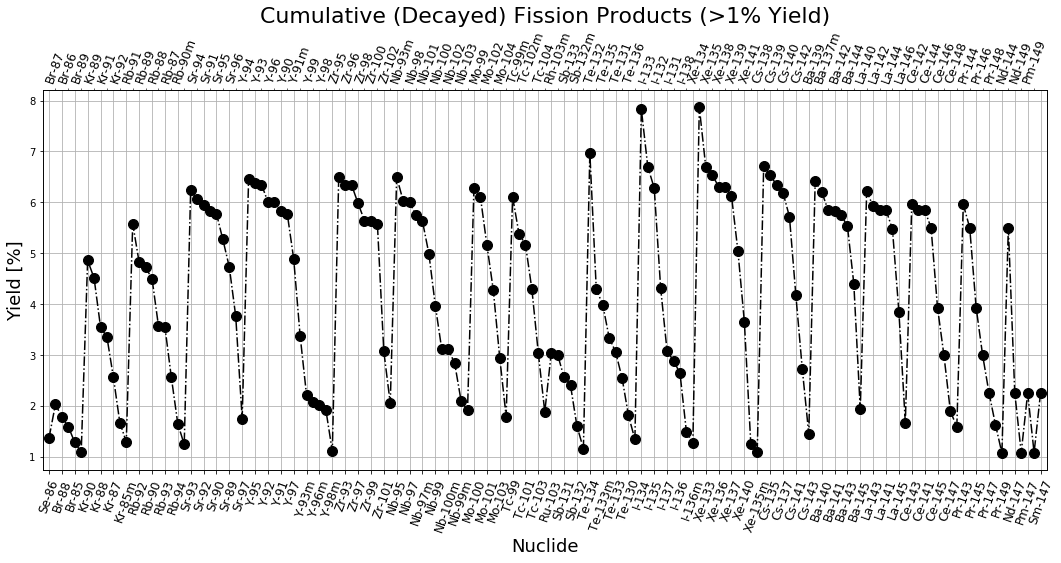

In [16]:
'''Plot FP nuclides with 1% or more fission yield'''

plot_nuclides(cfpy_1_percent)

In [17]:
'''Plot function for nuclides half-life'''

def plot_nuclides(fpy):
    
    from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
    (fig, ax) = plt.subplots(figsize=(18,7))

    ordered_fpy = sorted( fpy, key=lambda entry: entry.Z, reverse=False)
    
    ax.plot( [nc.Z for nc in ordered_fpy], [nc.half_life/3600/24/365 for nc in ordered_fpy], 
             ' ',color='black', marker='x',markersize=10 )
    
    #plt.xticks(range(0,len(nuclides),20),[nc.symbol for nc in nuclides.values()][::20],rotation=0,fontsize=12)
    min_z = min([nc.Z for nc in ordered_fpy])
    max_z = max([nc.Z for nc in ordered_fpy])

    ax.xaxis.set_ticks(range(min_z, max_z+1,2))
    ax.set_xlim((min_z-1,max_z+1))

    plt.xlabel(r'Nuclide Z Number',fontsize=18)
    plt.ylabel(r'$T_{1/2} [a]$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=16)
    
    # create a twin y axis to reconfigure the top x axis
    ay1 = ax.twiny()
    ay1.set_xlim(ax.get_xlim())
    #ay1.xaxis.tick_top()
    ay1.set_xticks([])
    from mendeleev import element
    #ay1.set_xticks(range(0,len(atoms),2),[atm.symbol for atm in atoms][::2],rotation=0,fontsize=12)
    ay1.set_xticks(range(min_z,max_z+1), [element(z).symbol for z in range(min_z,max_z+1)])
    ay1.set_xticklabels([element(z).symbol for z in range(min_z,max_z+1)],minor=True,fontsize=12)

    min_a = min([nc.A for nc in ordered_fpy])
    max_a = max([nc.A for nc in ordered_fpy])
    
    plt.title(r'%i Nuclides: $%i \leq A \leq %i$ '%(len(fpy),min_a,max_a),fontsize=22)
    ax.grid(True)
    plt.yscale('log')
    plt.show()

    return

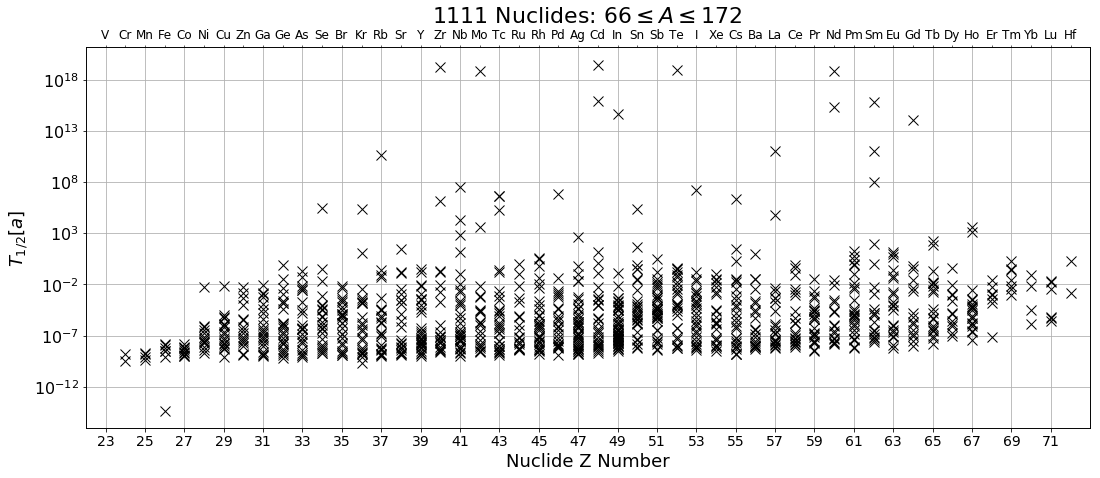

In [18]:
'''Plot half-life of nuclides'''

plot_nuclides(fpy_az)

## Cumulative fission products half-life times<a id="cfphalflife"></a>

For those with >=1%, >=0.1%, and >=0% yields.

In [28]:
'''Function to compute half-life times of given nuclides'''

def half_life_times(fp_list):

    ordered_fp_list = sorted( fp_list, key=lambda entry: entry.Z, reverse=False )
    #print(ordered_fp_list)
    
    half_life_1_10       = list()
    half_life_10_100     = list()
    half_life_100_1000   = list()
    half_life_1000_1M    = list()
    half_life_1M_10M     = list()
    half_life_10M_100M   = list()
    half_life_100M_infty = list()
     
    z_0 = 0
    for fp in ordered_fp_list:
        
        h_f_y = fp.half_life/3600/24/365
        name = fp.name
        element_name = fp.element_name
        
        assert fp.Z >= z_0
        z_0 = fp.Z
    
        save = (name,element_name)
        
        if h_f_y >= 1 and h_f_y < 10:
            half_life_1_10.append(save)
        elif h_f_y >= 10 and h_f_y < 100:
            half_life_10_100.append(save)
        elif h_f_y >= 100 and h_f_y < 1000:
            half_life_100_1000.append(save)
        elif h_f_y >= 1000 and h_f_y < 1e+6:
            half_life_1000_1M.append(save)
        elif h_f_y >= 1e+6 and h_f_y < 10e+6:
            half_life_1M_10M.append(save)
        elif h_f_y >= 10e+6 and h_f_y < 100e+6:
            half_life_10M_100M.append(save)
        else:
            half_life_100M_infty.append(save)
            
    print('|  Half-Life       |  FP Nuclides   |')
    print('|:-----------------|:------------|')
    nuclides = str()
    for ele in half_life_1_10:
        nuclides += ele[0]+', '
    print('|1 to 10 y         |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_10_100:
        nuclides += ele[0]+', '
    print('|10 to 100 y       |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_100_1000:
        nuclides += ele[0]+', '
    print('|100 to 1 ky       |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_1000_1M:
        nuclides += ele[0]+', '
    print('|1 ky to 1 My      |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_1M_10M:
        nuclides += ele[0]+', '
    print('|1 My to 10 My     |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_10M_100M:
        nuclides += ele[0]+', '
    print('|10 My to 100 My    |', nuclides[:-2],'|')
    nuclides = str()
    for ele in half_life_100M_infty:
        nuclides += ele[0]+', '
    #print('|100 My or greater  |', nuclides[:-2],'|')

    #print('')
    #print('1   to 10   years = ',half_life_1_10)
    #print('10  to 100  years = ',half_life_10_100)
    #print('100 to 1k   years = ',half_life_100_1000)
    #print('1k  to 1M   years = ',half_life_1000_1M)
    #print('1M  to 10M  years = ',half_life_1M_10M)
    #print('10M to 100M years = ',half_life_10M_100M)
    #print('100M to --> years = ',half_life_100M_infty)
    
    return

In [30]:
'''Compute half-life times of cumulative FP with >1% yield'''

print('total # of FP nuclides = ', len(cfpy_1_percent))
print('')

half_life_times( cfpy_1_percent ) # call the function

total # of FP nuclides =  155

|  Half-Life       |  FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Pm-147 |
|10 to 100 y       | Sr-90, Nb-93m, Cs-137 |
|100 to 1 ky       |  |
|1 ky to 1 My      | Tc-99 |
|1 My to 10 My     | Zr-93, Cs-135 |
|10 My to 100 My    |  |


|  Half-Life       |  $^{235}$U FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Pm-147 |
|10 to 100 y       | Sr-90, Nb-93m, Cs-137 |
|100 to 1 ky       |  |
|1 ky to 1 My      | Tc-99 |
|1 My to 10 My     | Zr-93, Cs-135 |
|10 My to 100 My    |  |

In [31]:
'''Compute half-life times of cumulative FP with >0.1% yield'''

cfpy_0dot1_percent = list()

for fp in fpy_az:
    if fp.cumulative_yield_percent >= 0.1:
        cfpy_0dot1_percent.append(fp)
        
print('total # of FP nuclides = ', len(cfpy_0dot1_percent))
print('')

half_life_times( cfpy_0dot1_percent )

total # of FP nuclides =  265

|  Half-Life       |  FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Ru-106, Pm-147 |
|10 to 100 y       | Kr-85, Sr-90, Nb-93m, Cs-137, Sm-151 |
|100 to 1 ky       |  |
|1 ky to 1 My      | Tc-99 |
|1 My to 10 My     | Zr-93, Pd-107, Cs-135 |
|10 My to 100 My    | I-129 |


|  Half-Life       | $^{235}$U FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Ru-106, Pm-147 |
|10 to 100 y       | Kr-85, Sr-90, Nb-93m, Cs-137, Sm-151 |
|100 to 1 ky       |  |
|1 ky to 1 My      | Tc-99 |
|1 My to 10 My     | Zr-93, Pd-107, Cs-135 |
|10 My to 100 My    | I-129 |

In [32]:
'''Compute half-life times of cumulative FP all yields'''

print('total # of FP nuclides = ', len(fpy_az))
print('')

half_life_times( fpy_az ) # call the function

total # of FP nuclides =  1111

|  Half-Life       |  FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Ru-106, Rh-102m, Rh-101, Cd-109, Sb-125, Cs-134, Pm-147, Pm-146, Eu-155, Eu-154, Tm-171, Hf-172 |
|10 to 100 y       | Kr-85, Sr-90, Nb-93m, Cd-113m, Sn-121m, Cs-137, Ba-133, Pm-145, Sm-151, Eu-152, Tb-157 |
|100 to 1 ky       | Nb-91, Ag-108m, Tb-158 |
|1 ky to 1 My      | Se-79, Kr-81, Nb-94, Mo-93, Tc-99, Sn-126, La-137, Ho-166m, Ho-163 |
|1 My to 10 My     | Zr-93, Tc-98, Tc-97, Pd-107, Cs-135 |
|10 My to 100 My    | Nb-92, I-129 |


|  Half-Life       |  $^{235}$U FP Nuclides   |
|:-----------------|:------------|
|1 to 10 y         | Ru-106, Rh-102m, Rh-101, Cd-109, Sb-125, Cs-134, Pm-147, Pm-146, Eu-155, Eu-154, Tm-171, Hf-172 |
|10 to 100 y       | Kr-85, Sr-90, Nb-93m, Cd-113m, Sn-121m, Cs-137, Ba-133, Pm-145, Sm-151, Eu-152, Tb-157 |
|100 to 1 ky       | Nb-91, Ag-108m, Tb-158 |
|1 ky to 1 My      | Se-79, Kr-81, Nb-94, Mo-93, Tc-99, Sn-126, La-137, Ho-166m, Ho-163 |
|1 My to 10 My     | Zr-93, Tc-98, Tc-97, Pd-107, Cs-135 |
|10 My to 100 My    | Nb-92, I-129 |